# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c("index", "max_t", "temp", "corr12", "corr23", "corr13", "corr_fit", "corr34", "corr24", "corr14")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
overview[overview$max_t == 16, ]
overview[overview$max_t == 24, ]
overview[overview$max_t == 36, ]
overview[overview$max_t == 54, ]

,index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,16,0.20,13.00,2.09,5.85,19.91,5.59,6.37,12.48
2,1,16,0.21,9.56,9.63,71.71,-37481.67,8.02,9.19,3396.54
3,2,16,0.22,253.95,2.03,11.08,-20832.82,28.83,4.08,84.51
4,3,16,0.23,88614.29,5.14,16.13,-46799.03,37.46,11.28,27.82
5,4,16,0.24,8.39,9.03,11.95,9.94,2.85,9.33,9.54
6,5,16,0.25,12.02,2.78,7.09,25.00,5.35,4.33,8.11
7,6,16,0.26,86.95,2.87,7.67,15.57,3.49,5.39,11.97
8,7,16,0.27,8.13,4.76,7.17,9.19,3.97,5.10,9.16
9,8,16,0.28,6.08,21.05,8.19,6.83,2.65,8.56,6.86


,index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
301,300,24,0.20,9.24,86.15,97.07,13.39,2.19,37.98,47.85
302,301,24,0.21,21.42,133.15,41.52,-1480281.64,4.62,136.74,35.28
303,302,24,0.22,69.91,16.65,39.95,34460.20,38.23,270.59,148.16
304,303,24,0.23,8.05,5.24,7.69,8.66,10.75,63.86,13.00
305,304,24,0.24,36.65,14.73,113.61,-255773.18,2.29,4.62,10.69
306,305,24,0.25,8.40,3.43,6.35,8.13,5.08,5.39,7.61
307,306,24,0.26,11.18,3.83,7.58,10.23,7.25,7.30,12.32
308,307,24,0.27,5.52,5.76,5.92,5.86,389.68,12.96,8.45
309,308,24,0.28,6.29,65.07,8.32,6.83,3.41,7.94,7.80


,index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
601,600,36,0.20,19.93,6.69,14.30,19.28,5.82,36.80,21.73
602,601,36,0.21,54.02,13.82,29.72,1713413.48,19.19,20.46,36.83
603,602,36,0.22,47.25,23.27,42.56,-276939.01,2.10,7.36,17.03
604,603,36,0.23,12.36,29.98,18.33,13.99,6.92,12.52,18.43
605,604,36,0.24,26.26,11.22,20.55,32.99,2.66,5.59,12.17
606,605,36,0.25,12.90,3.14,7.25,10.73,16.11,4.94,8.93
607,606,36,0.26,7.45,4.33,6.32,7.29,9.26,7.32,7.88
608,607,36,0.27,6.05,9.13,7.30,6.61,4.72,10.49,7.11
609,608,36,0.28,5.96,4.76,5.61,6.01,4.04,4.62,5.55


,index,max_t,temp,corr12,corr23,corr13,corr_fit,corr34,corr24,corr14
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
901,900,54,0.20,40.81,5.47,18.96,1002307.98,54.17,10.20,27.70
902,901,54,0.21,24.54,5.66,12.93,17.77,4.93,5.41,11.19
903,902,54,0.22,22.55,10.24,19.30,24.37,4.34,7.63,14.35
904,903,54,0.23,20.83,23.51,52.25,22.81,4.57,3.97,8.68
905,904,54,0.24,11.34,9.46,11.21,11.04,11.14,13.57,12.01
906,905,54,0.25,9.72,36.17,12.90,10.36,6.14,14.17,11.84
907,906,54,0.26,9.84,19.65,13.75,11.06,5.12,24.20,11.84
908,907,54,0.27,6.22,6.80,6.41,6.58,45.48,9.53,7.43
909,908,54,0.28,6.08,6.50,6.19,5.95,5.29,5.87,6.13


## Compounded data examination

In [6]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_comp_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_comp_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr12_err <- round(d$corr12_err, digits = 2)
d$corr23_err <- round(d$corr23_err, digits = 2)
d$corr34_err <- round(d$corr34_err, digits = 2)
d$corr13_err <- round(d$corr13_err, digits = 2)
d$corr24_err <- round(d$corr24_err, digits = 2)
d$corr14_err <- round(d$corr14_err, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
average_corr12s <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
	average_corr12s <- append(average_corr12s, results$corr12[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts
d$corr12_average <- round(average_corr12s, digits = 2)

# Reordering columns
comp_overview <- d[, c("index", "max_t", "temp",
	"corr12_average", "corr_fit",
	"corr12", "corr12_err",
	"corr13", "corr13_err",
	"corr14", "corr14_err")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
comp_overview[comp_overview$max_t == 16, ]
comp_overview[comp_overview$max_t == 24, ]
comp_overview[comp_overview$max_t == 36, ]
comp_overview[comp_overview$max_t == 54, ]

,index,max_t,temp,corr12_average,corr_fit,corr12,corr12_err,corr13,corr13_err,corr14,corr14_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,16,0.20,30.12,-30317.48,46.75,1639.73,13.14,114.03,30.64,1170.10
2,1,16,0.21,72.71,-214365.22,57.05,6090.81,178.89,7661.58,81.72,1706.39
3,2,16,0.22,66.83,25.21,38.70,1008.03,14.44,71.84,10.53,21.91
4,3,16,0.23,8883.60,145295.54,29.01,256.16,79.06,1157.78,310.86,27129.30
5,4,16,0.24,68.84,31.15,35.02,765.94,11.43,45.84,18.63,164.70
6,5,16,0.25,19.92,28.66,19.55,145.72,17.76,35.42,12.00,21.76
7,6,16,0.26,16.89,11.68,11.36,6.41,12.54,6.93,11.32,4.30
8,7,16,0.27,12.83,8.67,8.62,22.57,8.10,14.77,9.13,20.04
9,8,16,0.28,6.50,6.86,6.70,9.60,7.53,10.07,6.52,5.30


,index,max_t,temp,corr12_average,corr_fit,corr12,corr12_err,corr13,corr13_err,corr14,corr14_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,300,24,0.20,435.89,38427.08,157.09,20136.04,60.82,2112.52,24.39,460.79
32,301,24,0.21,57.21,-37375.27,98.91,3235.65,24.23,253.95,188.98,4266.54
33,302,24,0.22,37.96,-883361.46,78.98,5193.02,153.69,3765.47,23.75,262.05
34,303,24,0.23,58.26,20.88,18.03,152.26,19.14,261.75,45.64,1639.13
35,304,24,0.24,21.35,16.66,18.41,229.28,15.37,131.96,18.46,154.34
36,305,24,0.25,10.72,10.01,10.61,32.94,8.99,14.33,8.61,12.43
37,306,24,0.26,10.66,9.32,9.33,21.99,9.41,17.62,9.04,15.70
38,307,24,0.27,7.46,7.17,7.29,4.47,7.14,4.14,6.54,2.13
39,308,24,0.28,5.89,5.89,5.82,3.13,5.87,2.12,6.20,1.96


,index,max_t,temp,corr12_average,corr_fit,corr12,corr12_err,corr13,corr13_err,corr14,corr14_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,600,36,0.20,1422.82,75.02,39.53,1008.43,68.04,2671.83,30.75,308.58
62,601,36,0.21,38.96,26.07,25.47,1178.96,23.20,568.13,30.70,916.02
63,602,36,0.22,39.61,47.15,38.80,1200.94,31.93,797.20,32.98,809.50
64,603,36,0.23,90.00,18.91,18.66,242.95,20.98,250.46,14.12,89.53
65,604,36,0.24,16.44,13.39,12.73,85.99,14.70,78.72,17.28,114.34
66,605,36,0.25,12.36,11.13,11.91,39.13,9.64,6.89,9.78,5.54
67,606,36,0.26,9.43,8.97,9.18,8.97,8.55,8.81,8.84,6.58
68,607,36,0.27,7.01,7.06,6.90,10.98,6.97,7.53,7.59,9.69
69,608,36,0.28,6.13,6.13,6.08,12.04,6.42,7.13,5.82,4.07


,index,max_t,temp,corr12_average,corr_fit,corr12,corr12_err,corr13,corr13_err,corr14,corr14_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
91,900,54,0.20,265.84,-797651.98,192.40,162896.21,81.06,30065.25,648.14,263534.57
92,901,54,0.21,23.53,20.64,21.26,774.42,19.26,249.22,18.11,182.83
93,902,54,0.22,38.74,26.33,25.25,1686.99,32.69,2460.92,24.67,1004.16
94,903,54,0.23,20.31,15.85,16.68,393.40,15.36,219.95,12.72,132.79
95,904,54,0.24,13.62,12.51,12.15,79.80,14.34,114.40,12.65,70.09
96,905,54,0.25,9.79,10.04,9.64,14.14,10.92,10.67,10.13,21.54
97,906,54,0.26,8.96,8.65,8.66,7.97,8.54,9.28,8.74,4.42
98,907,54,0.27,7.25,6.91,7.13,15.40,6.70,13.43,7.07,9.34
99,908,54,0.28,6.43,6.12,6.25,31.79,6.34,10.27,5.86,6.43


## Compounded correlation lengths

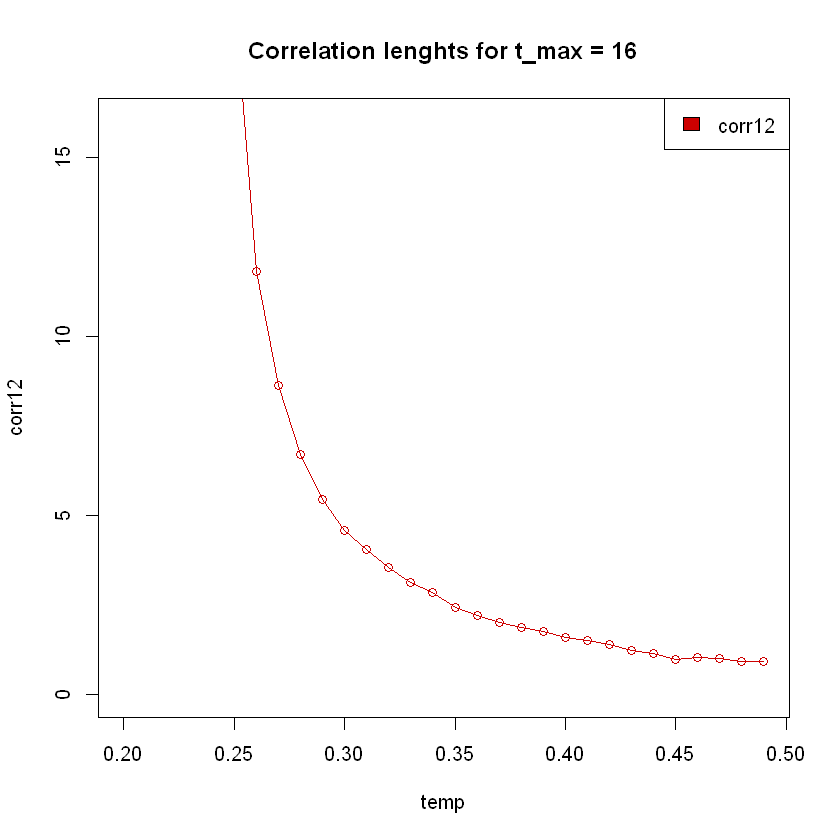

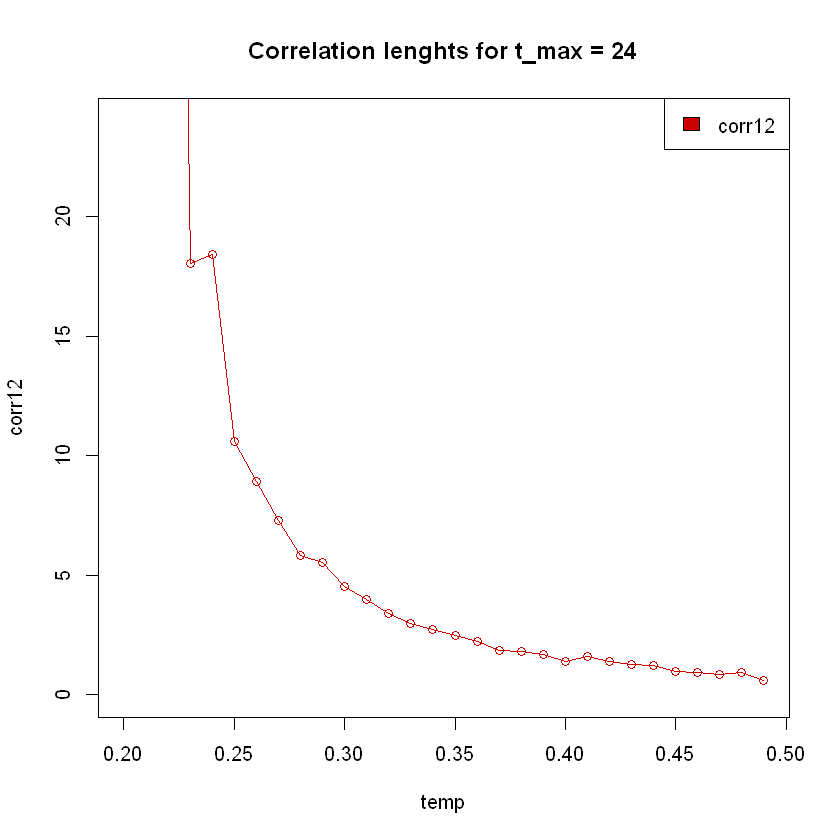

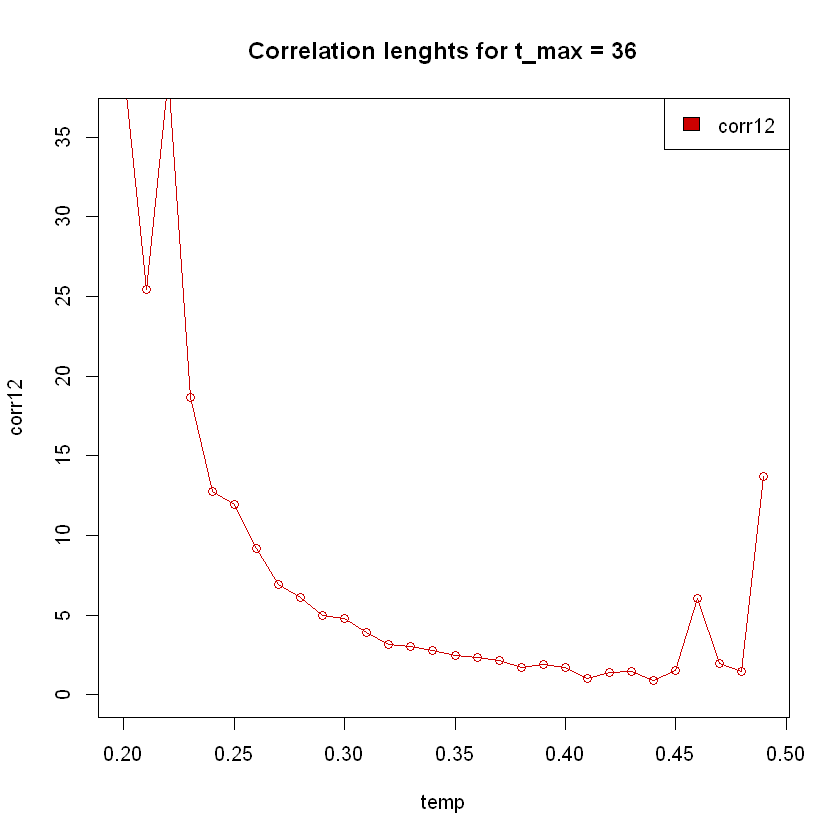

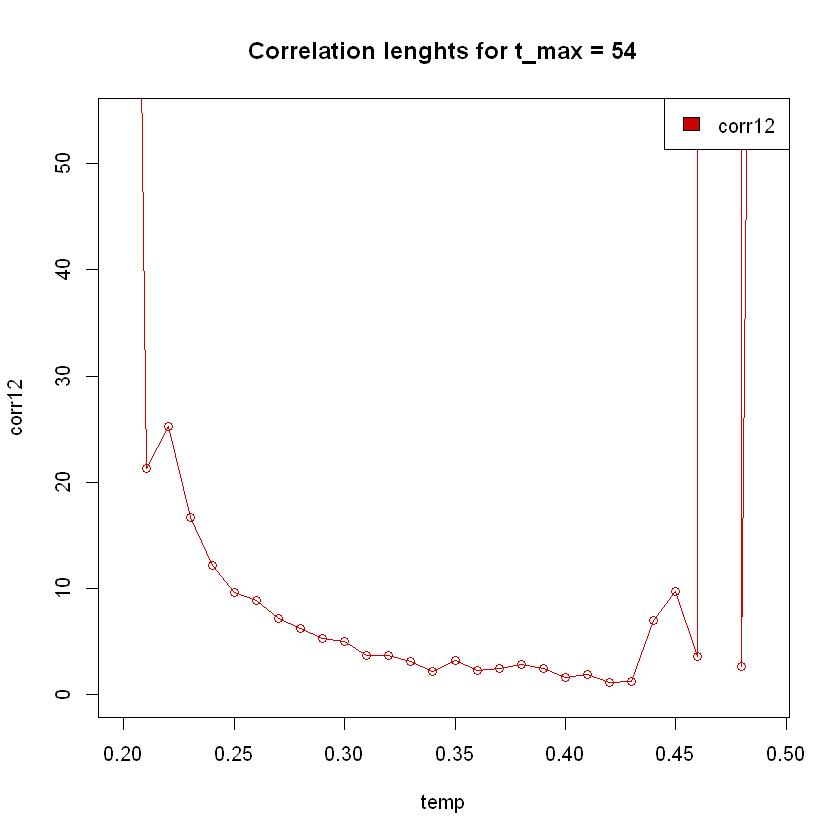

In [3]:
for (size in c(16, 24, 36, 54)) {
d <- comp_overview[comp_overview$max_t == size, c("max_t", "temp", "corr12")]
plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
title(paste("Correlation lenghts for t_max =", size))
legend <- list(names = c("corr12"), cols = "red3")
legend("topright", y = legend$names, fill = legend$cols)
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

,index,max_t,temp,corr12,corr_beta_ratio,corr12_15,corr_step_ratio
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,276,16,0.26,11.82,0.738750,8.94,0.7563452
8,277,16,0.27,8.62,0.538750,7.29,0.8457077
9,278,16,0.28,6.70,0.418750,5.82,0.8686567
10,279,16,0.29,5.46,0.341250,5.55,1.0164835
11,280,16,0.30,4.57,0.285625,4.54,0.9934354
12,281,16,0.31,4.05,0.253125,3.99,0.9851852
13,282,16,0.32,3.55,0.221875,3.41,0.9605634
14,283,16,0.33,3.13,0.195625,2.98,0.9520767
15,284,16,0.34,2.84,0.177500,2.74,0.9647887


,index,max_t,temp,corr12,corr_beta_ratio,corr12_15,corr_step_ratio
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36,575,24,0.25,10.61,0.44208333,11.91,1.1225259
37,576,24,0.26,8.94,0.37250000,9.20,1.0290828
38,577,24,0.27,7.29,0.30375000,6.90,0.9465021
39,578,24,0.28,5.82,0.24250000,6.08,1.0446735
40,579,24,0.29,5.55,0.23125000,4.99,0.8990991
41,580,24,0.30,4.54,0.18916667,4.76,1.0484581
42,581,24,0.31,3.99,0.16625000,3.92,0.9824561
43,582,24,0.32,3.41,0.14208333,3.13,0.9178886
44,583,24,0.33,2.98,0.12416667,3.03,1.0167785


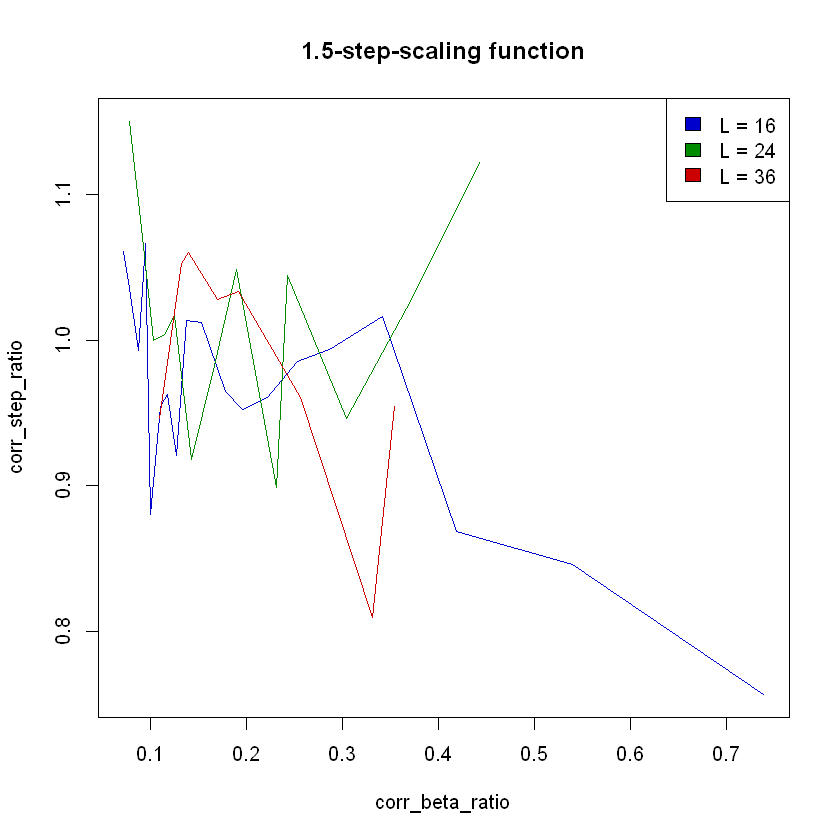

In [7]:
# Loading data
d <- comp_overview[, c("index", "max_t", "temp", "corr12")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$max_t
d$corr12_15 <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$max_t[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$max_t, d$corr12[d$temp == my_temp & d$max_t == next_size][1], 0)
}
d$corr_step_ratio <- d$corr12_15 / d$corr12

d <- d[d$corr12 <= d$max_t, ]

d16 <- d[d$max_t == 16, ]
d24 <- d[d$max_t == 24, ]
d36 <- d[d$max_t == 36, ]

d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.44, ]
d24 <- d24[d24$temp >= 0.25 & d24$temp <= 0.37, ]
d36 <- d36[d36$temp >= 0.24 & d36$temp <= 0.31, ]

d16
d24
#d36

dat <- rbind(d16, d24, d36)

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "l",
	pch = 19,
	xlim = c(min(dat$corr_beta_ratio), max(dat$corr_beta_ratio)),
	ylim = c(min(dat$corr_step_ratio), max(dat$corr_step_ratio))
)
if(TRUE) {
	#points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
}
if(TRUE) {
	#points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
}
title("1.5-step-scaling function")
legend("topright", y = c("L = 16", "L = 24", "L = 36"), fill = c("blue3", "green4", "red3"))

## Compounded correlation functions

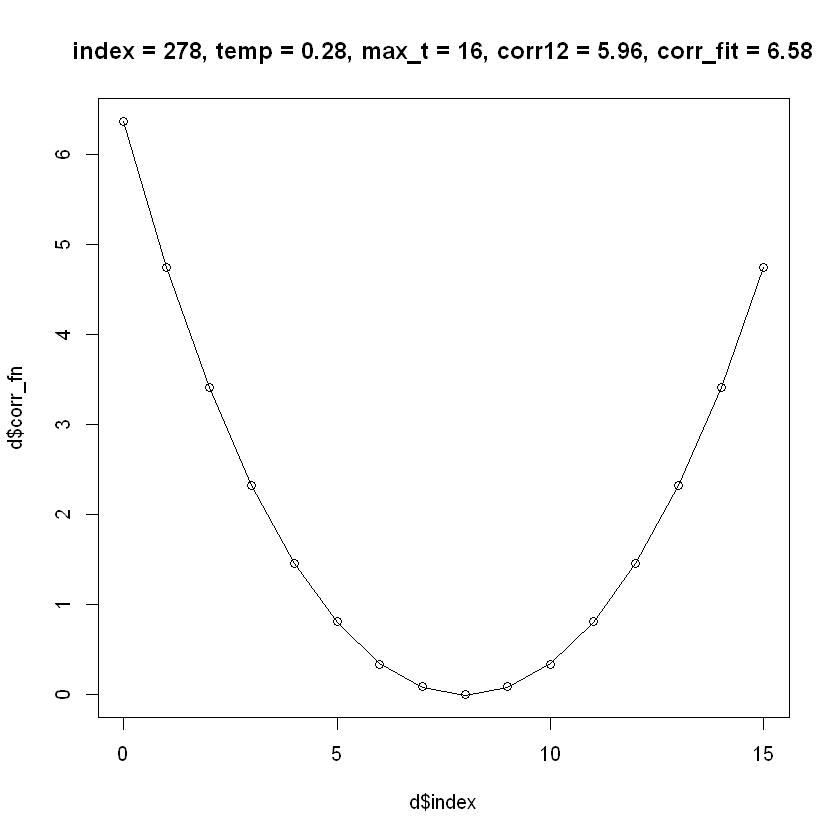

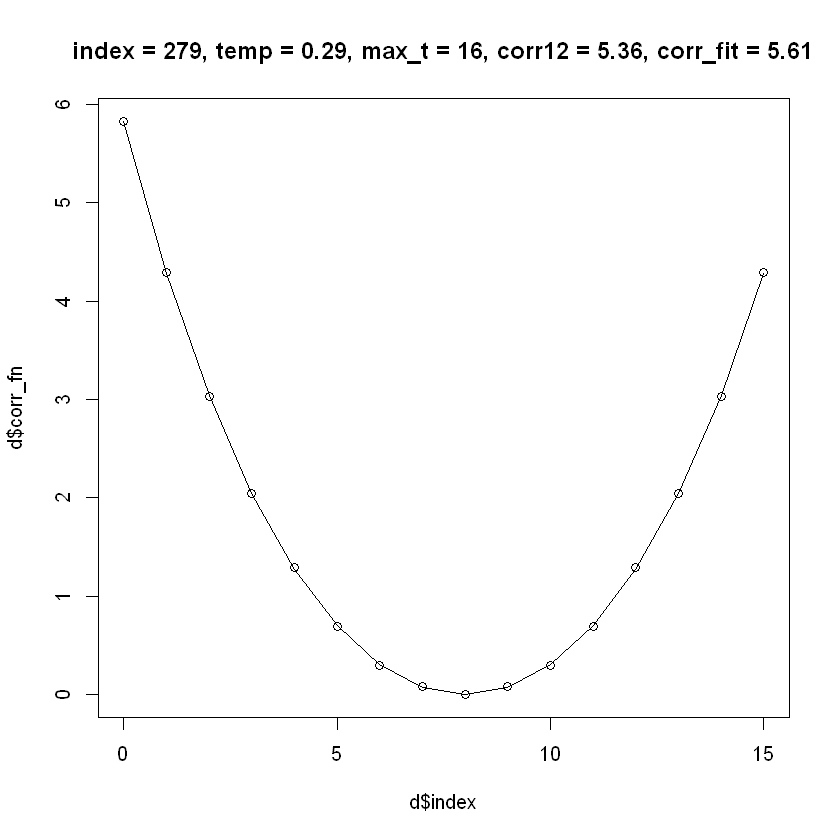

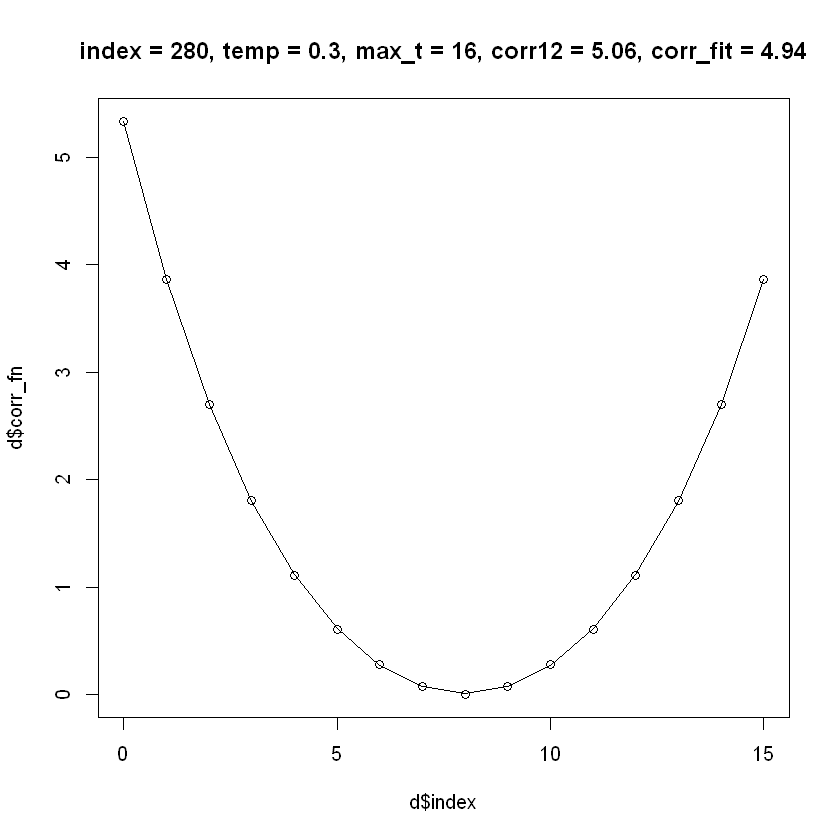

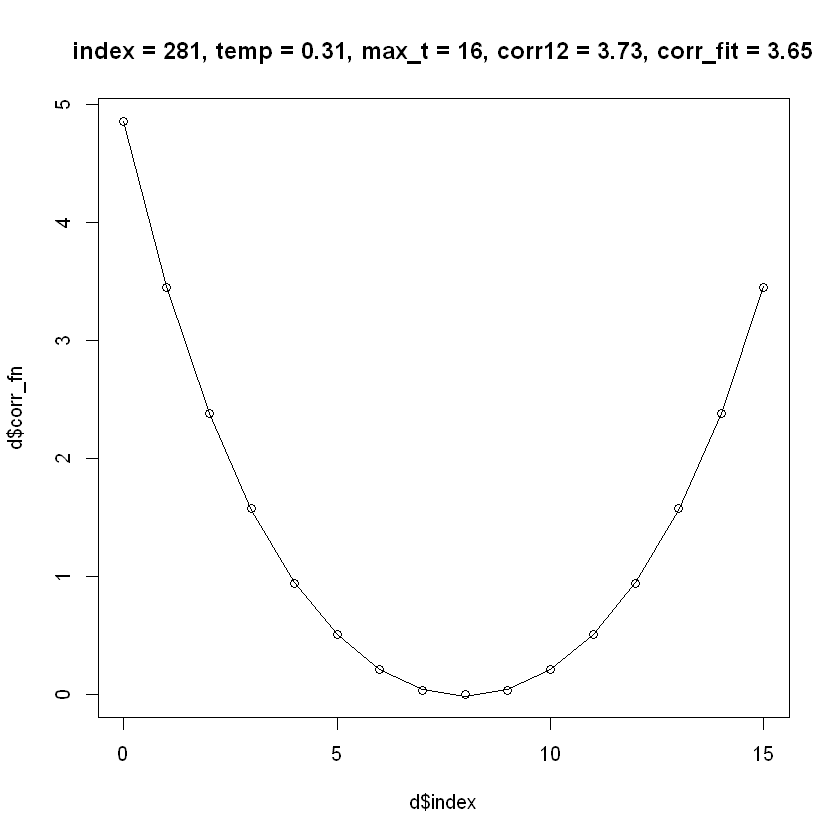

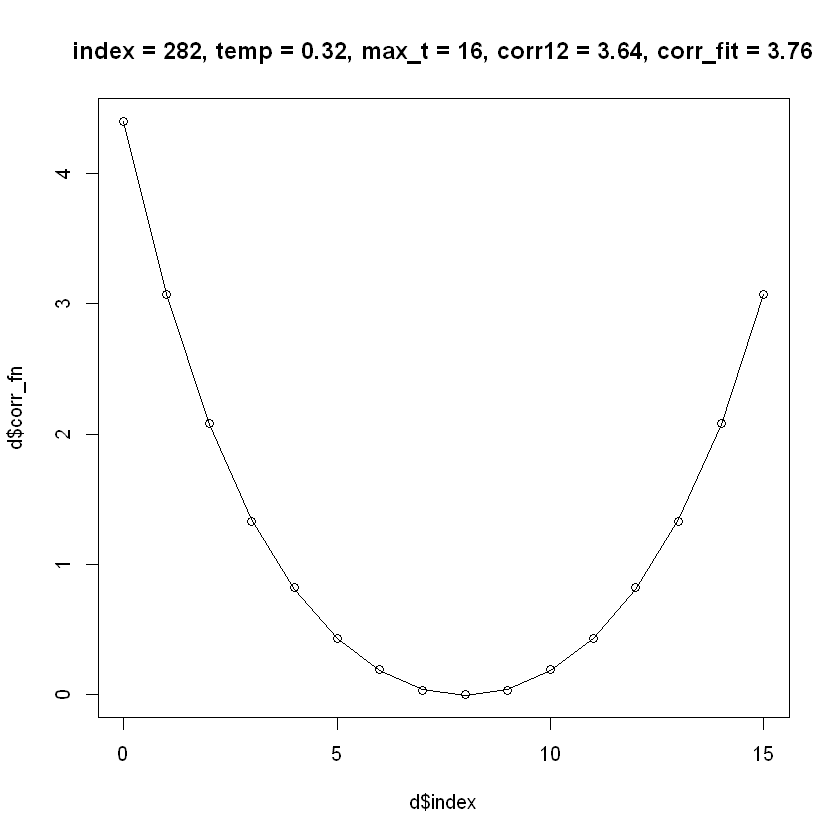

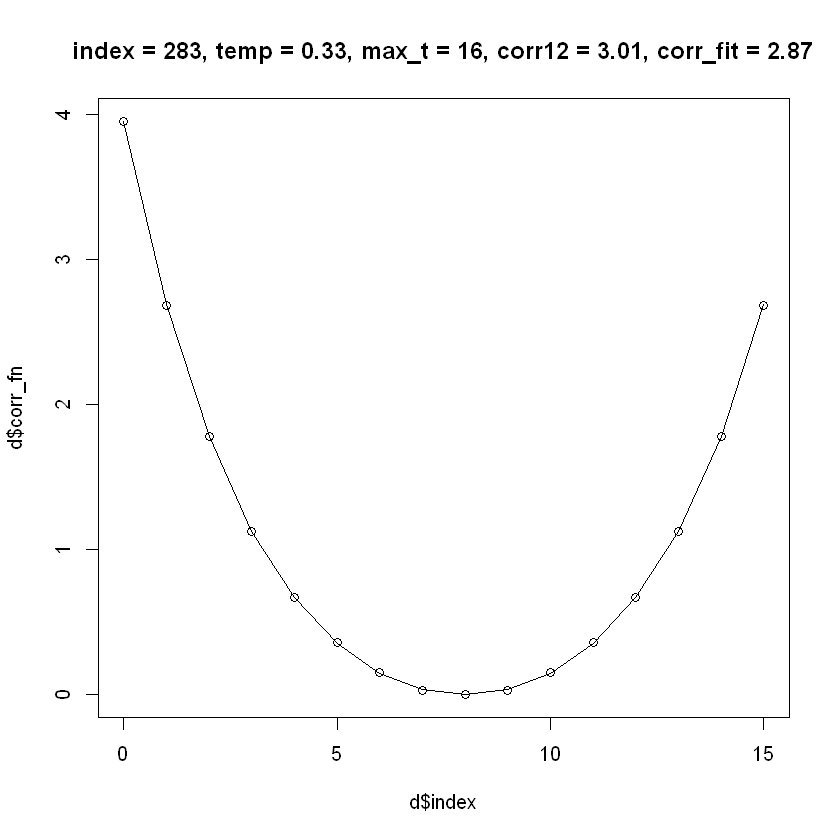

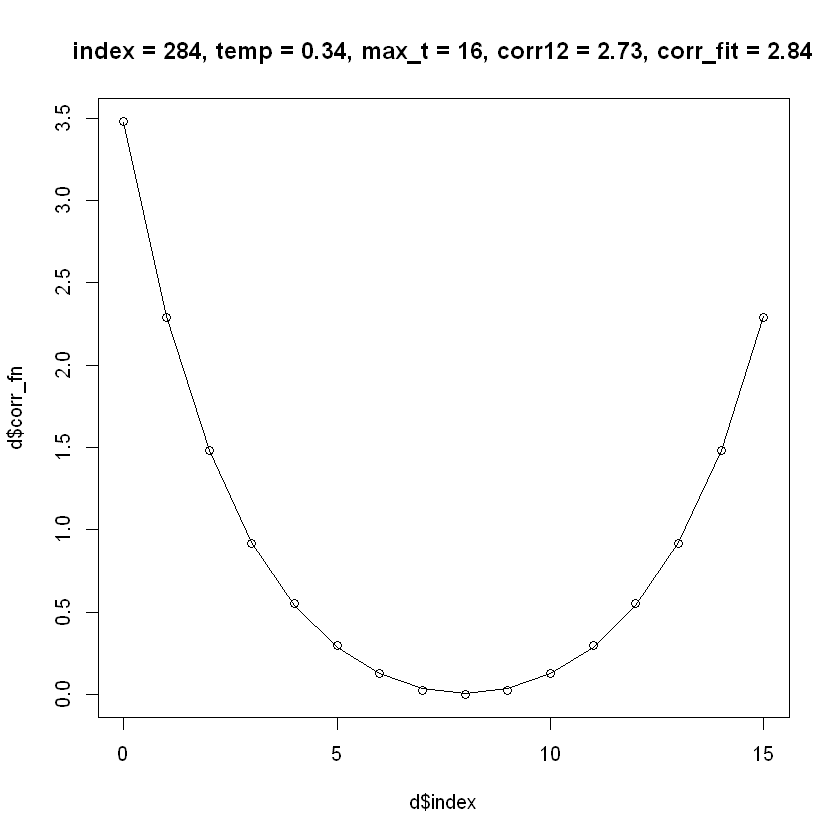

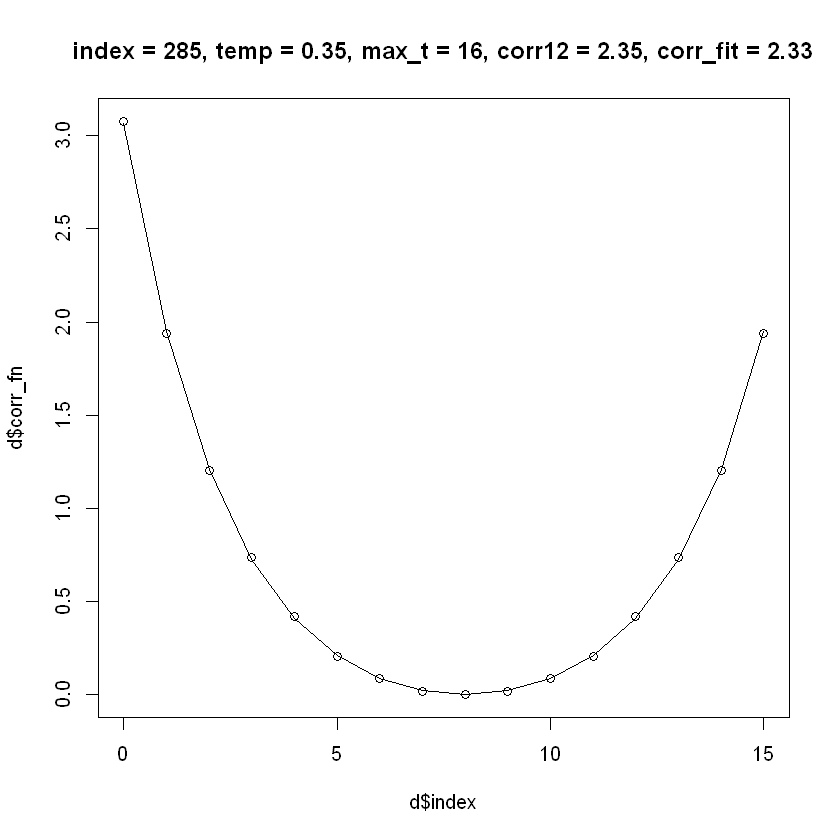

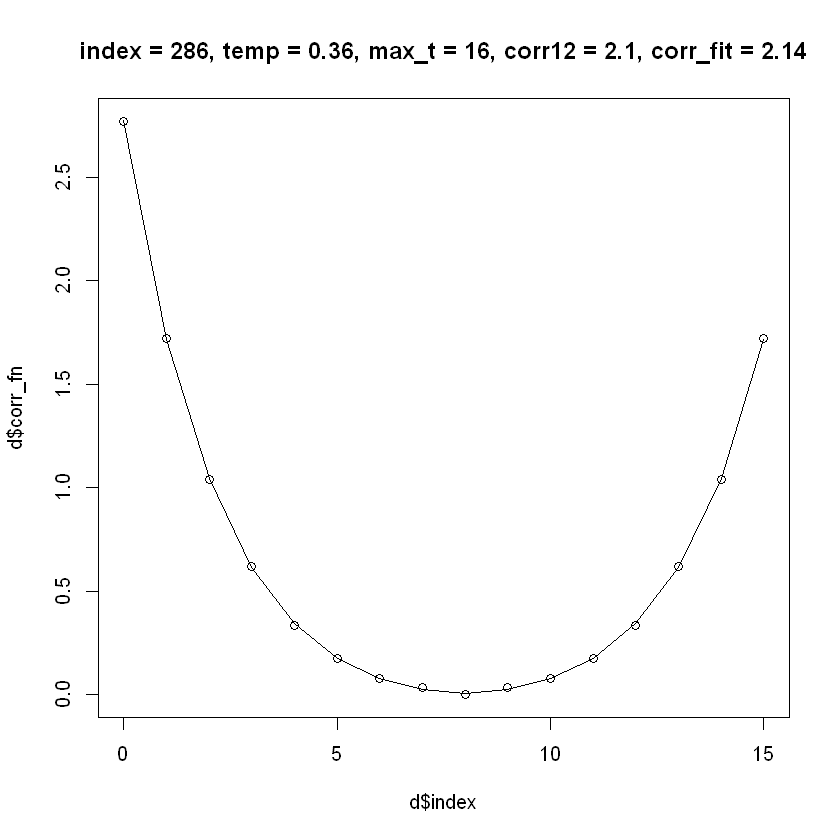

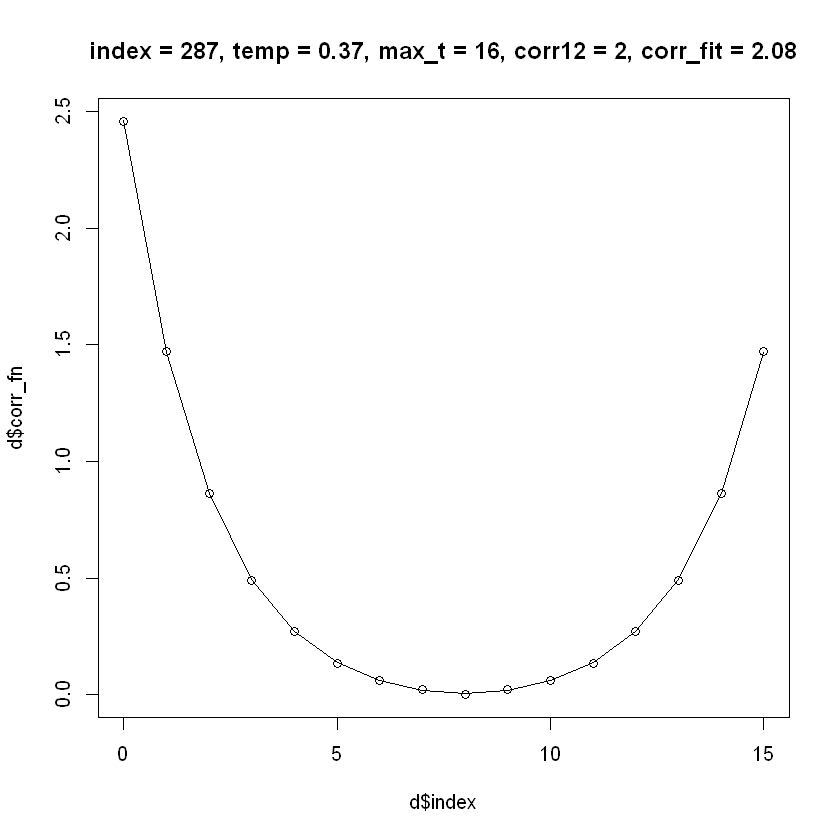

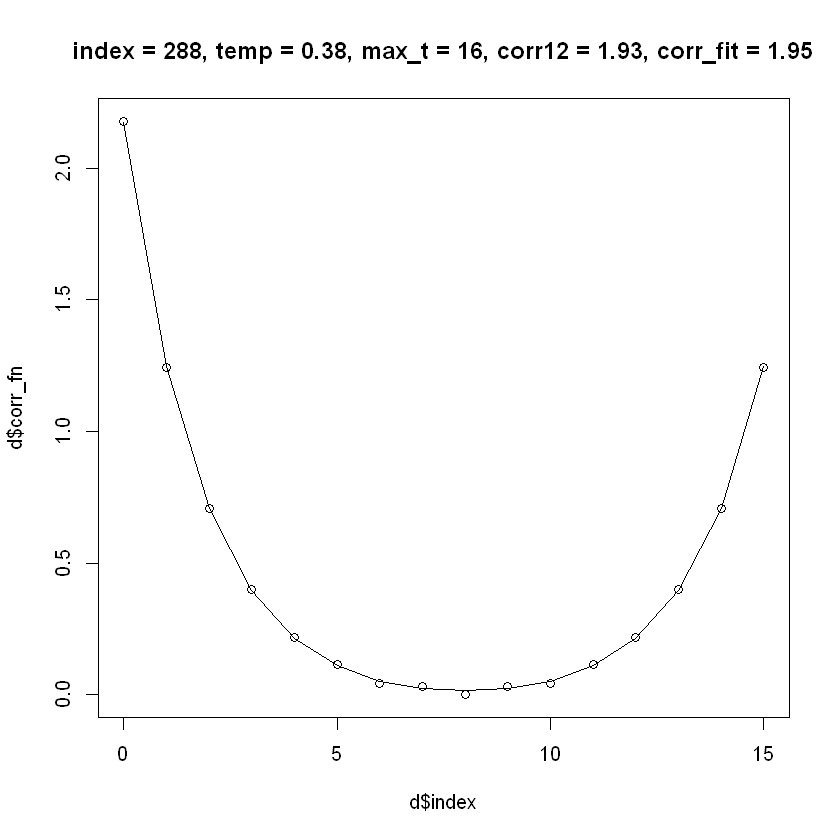

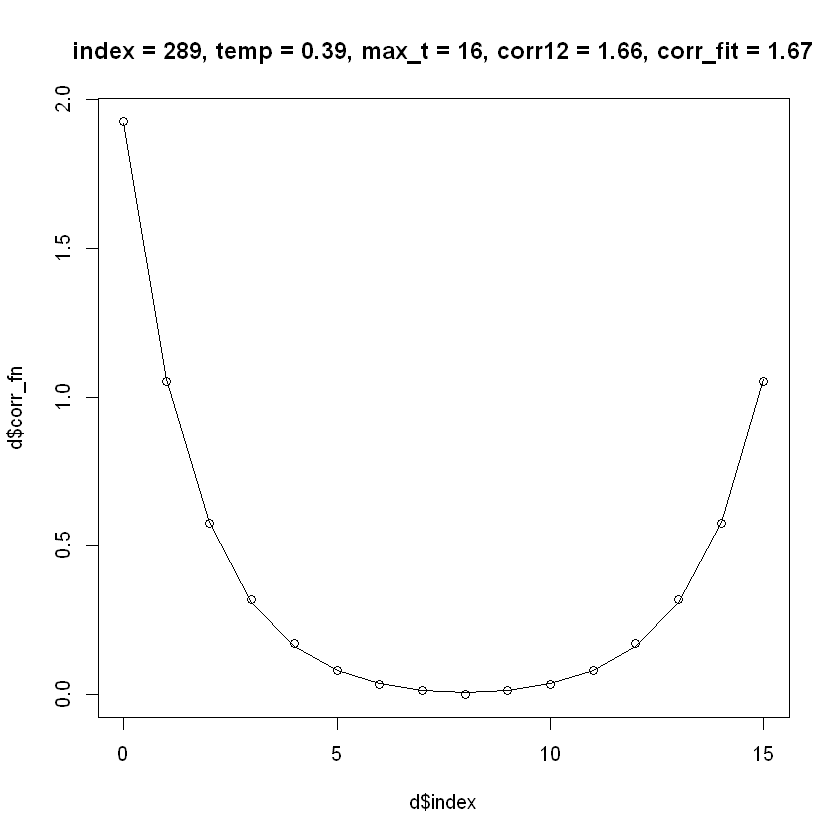

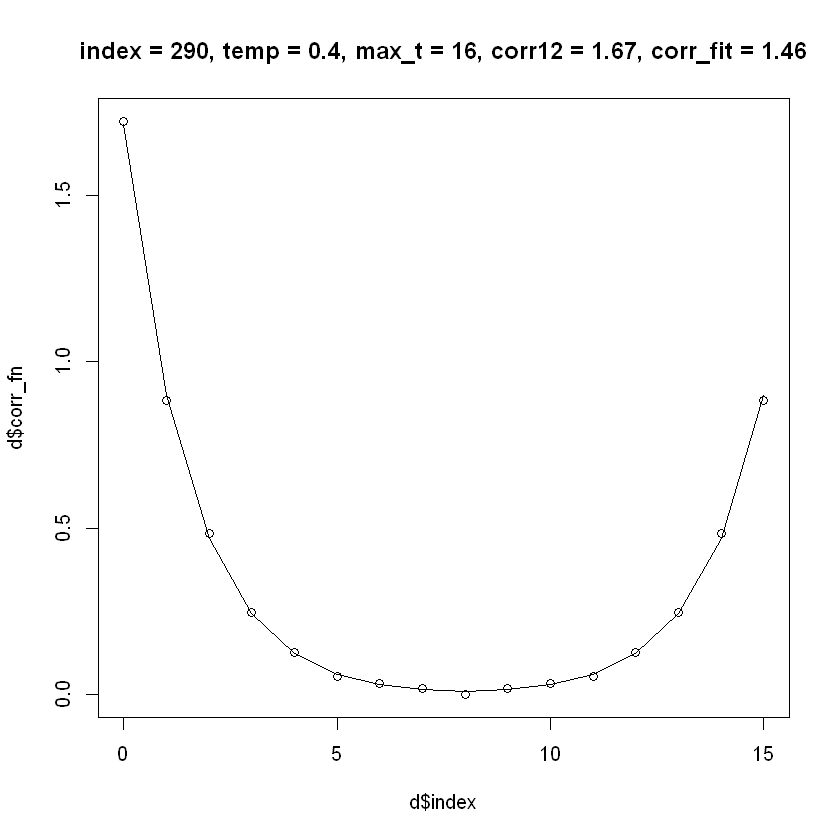

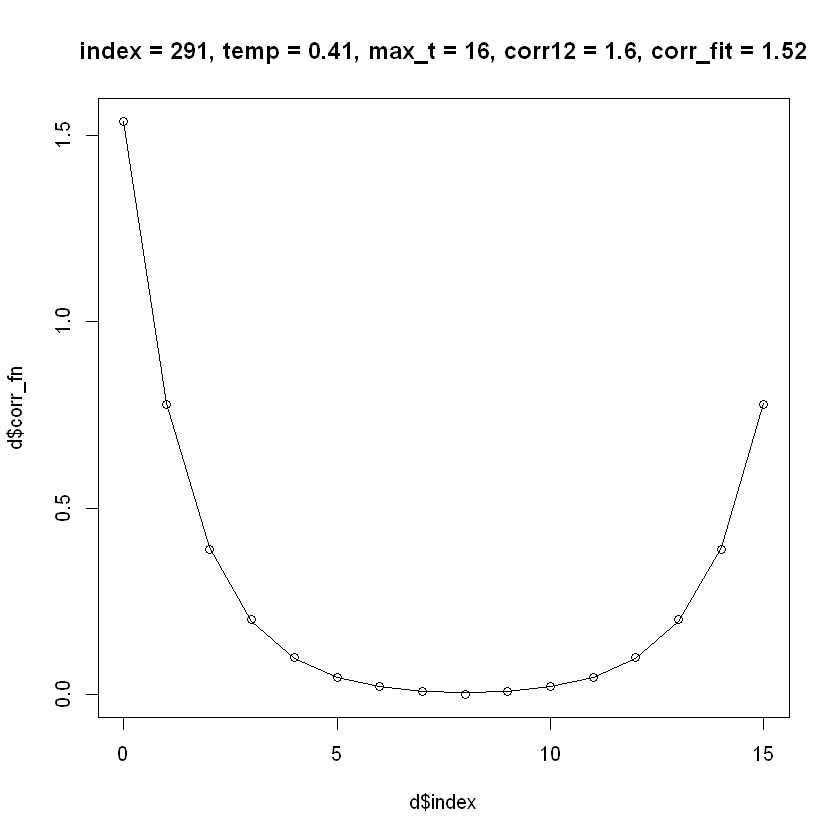

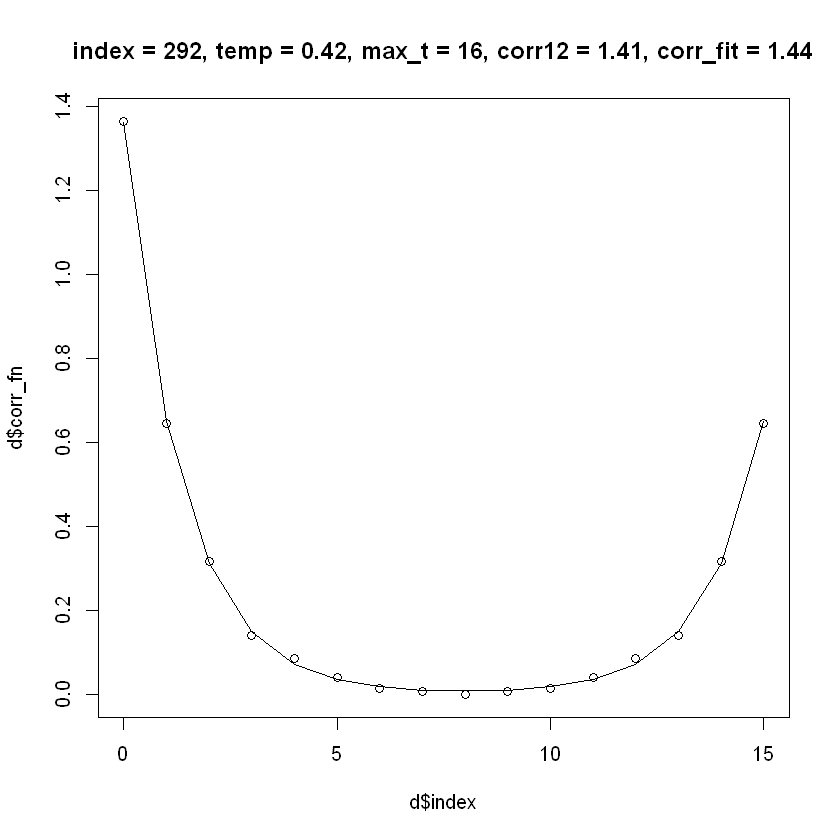

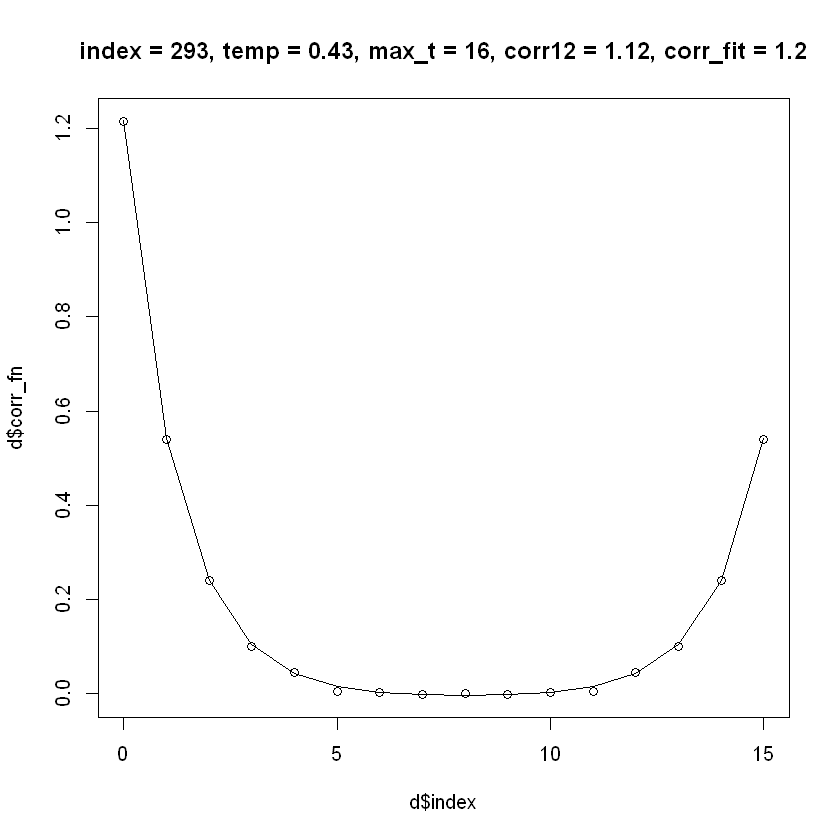

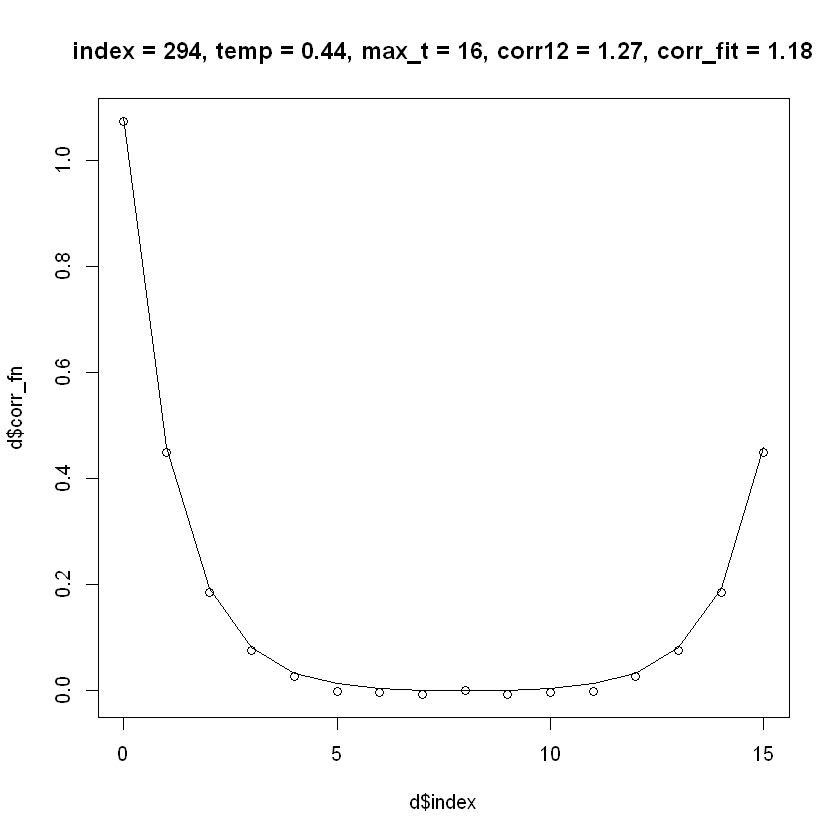

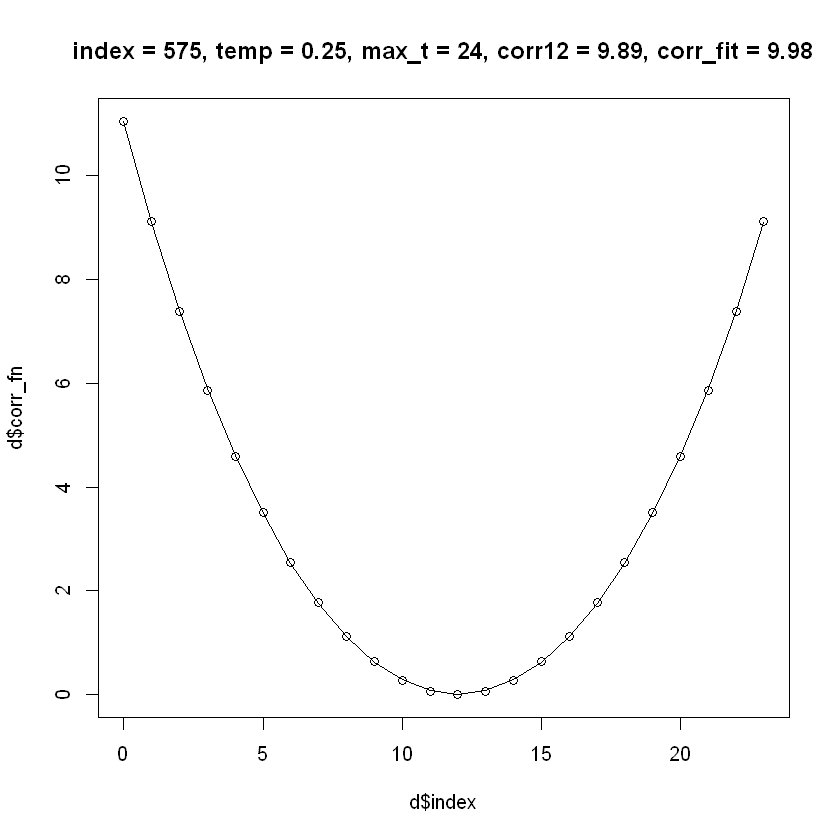

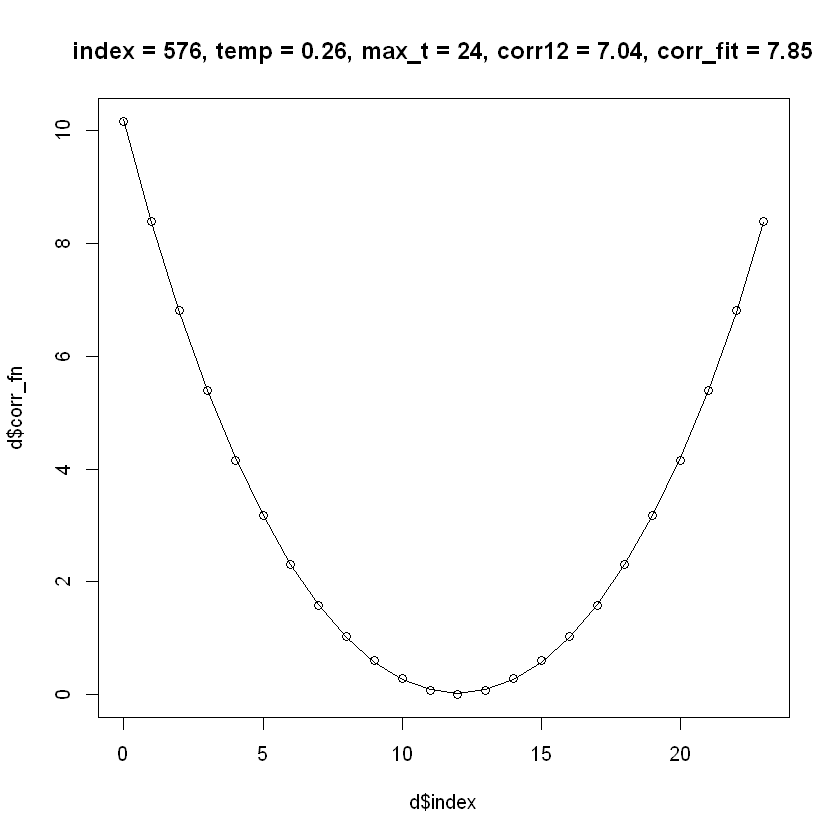

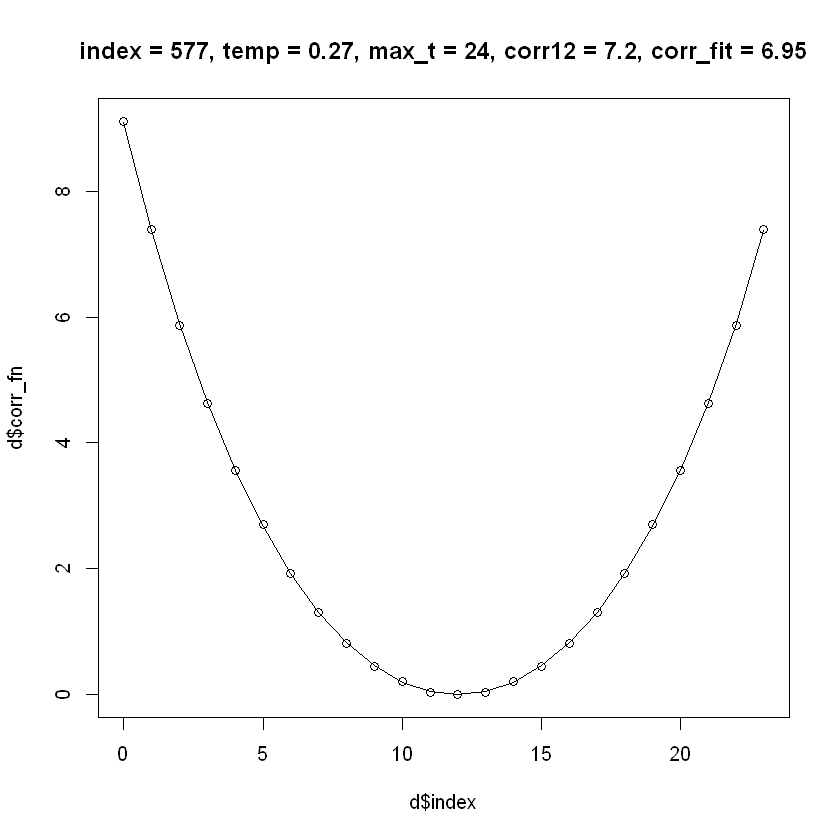

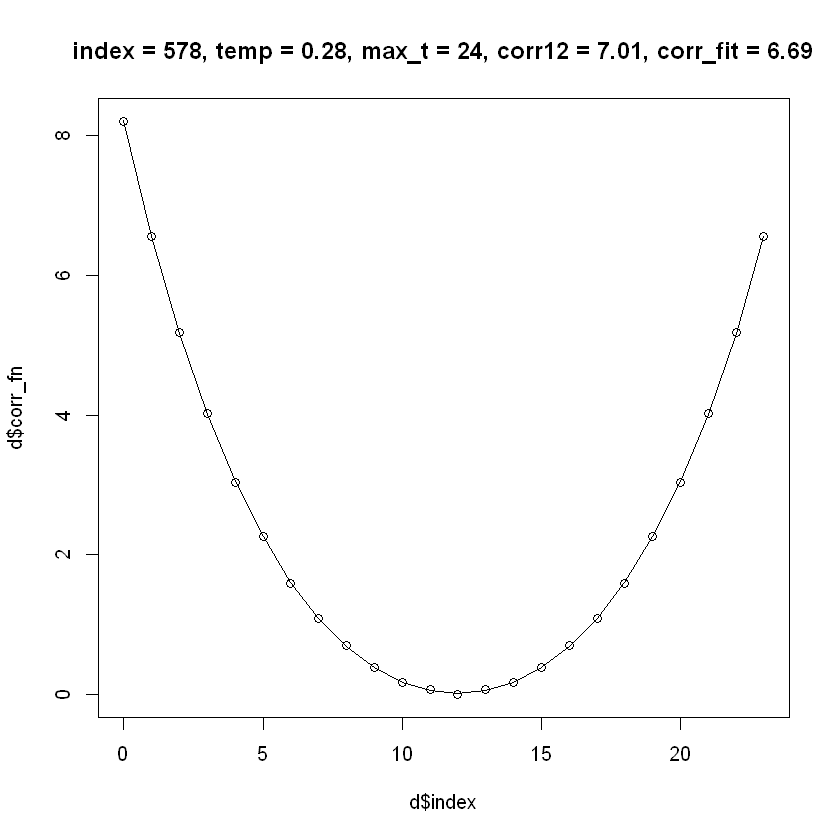

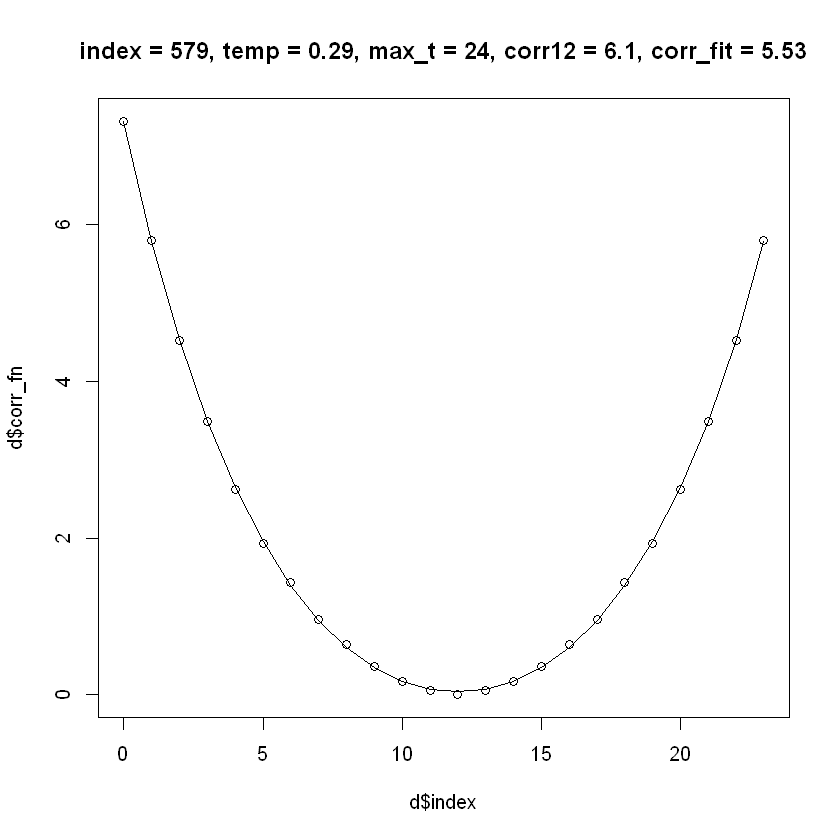

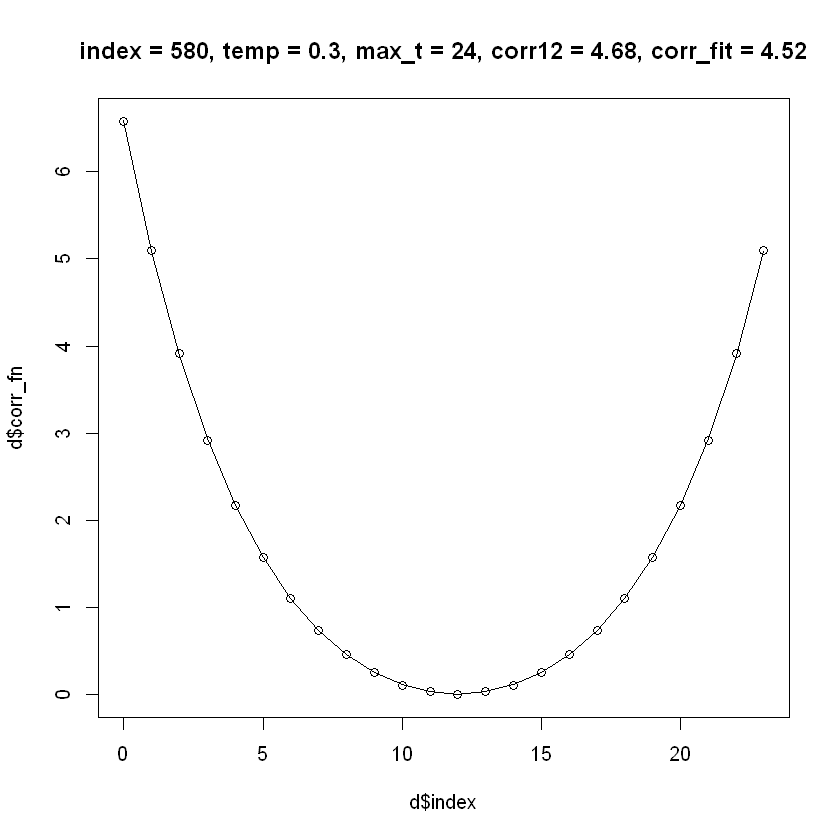

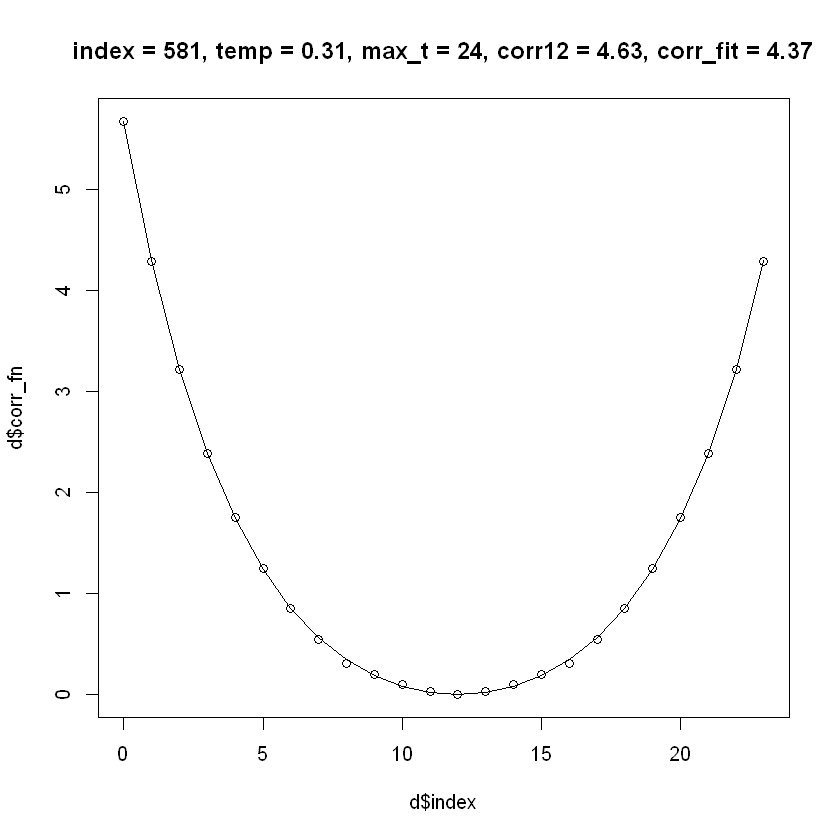

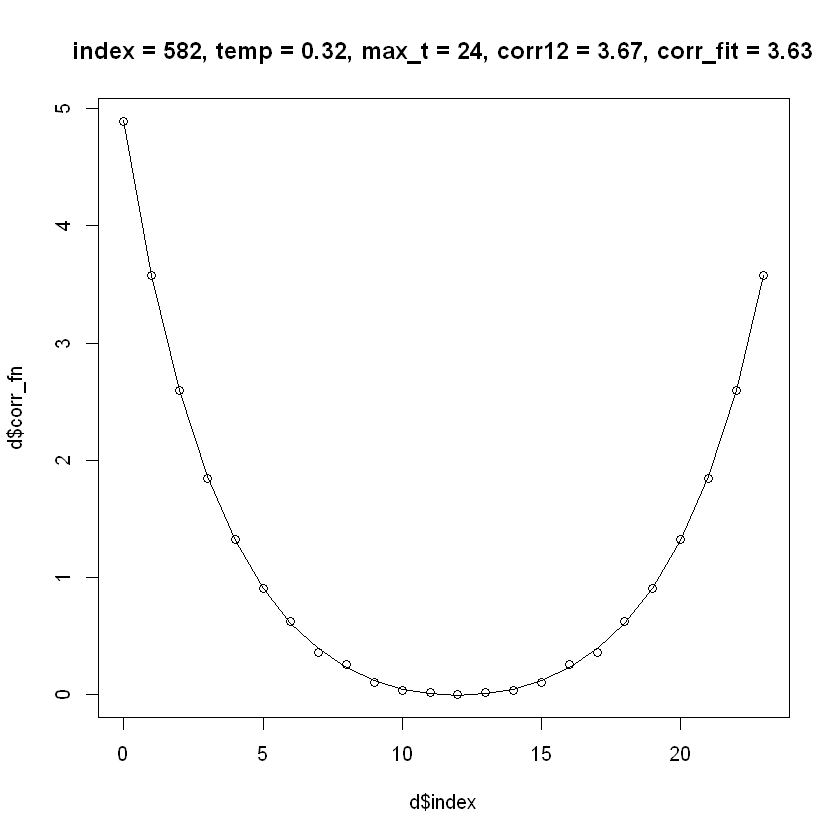

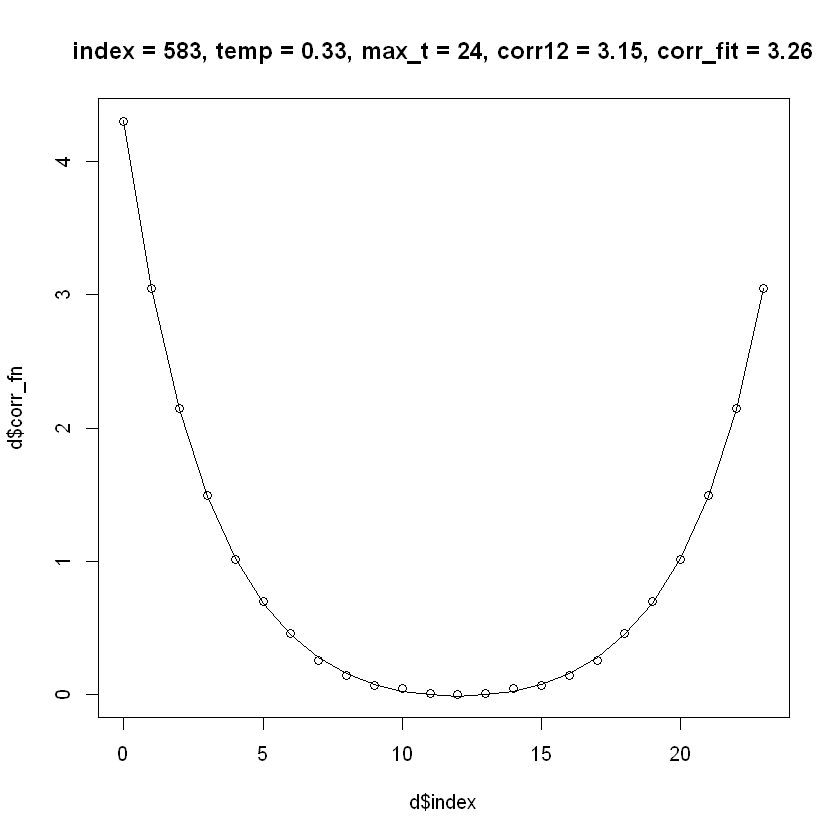

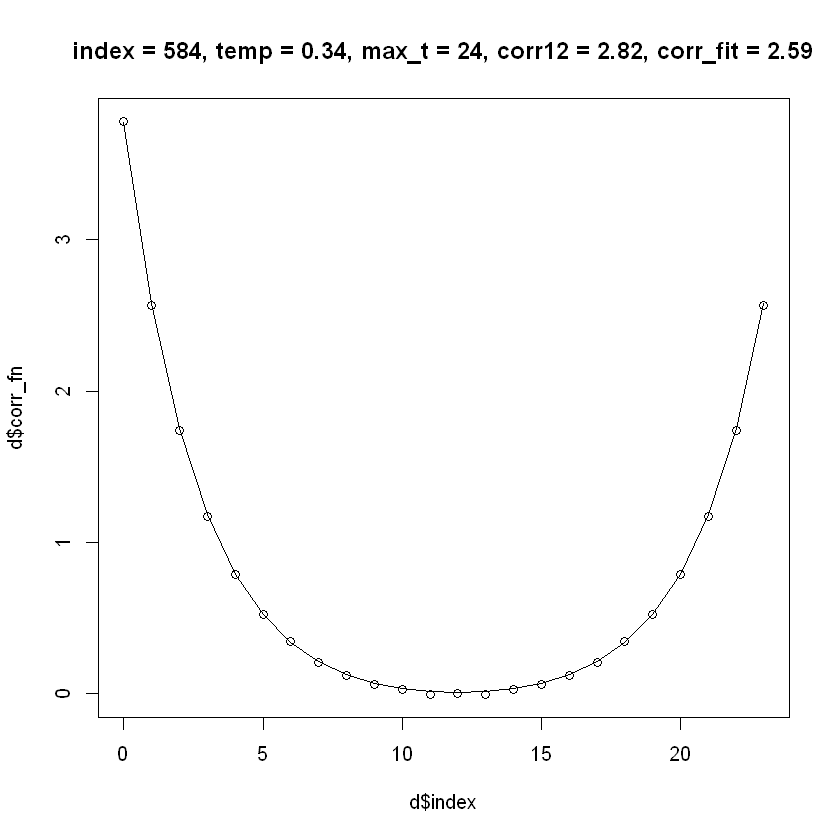

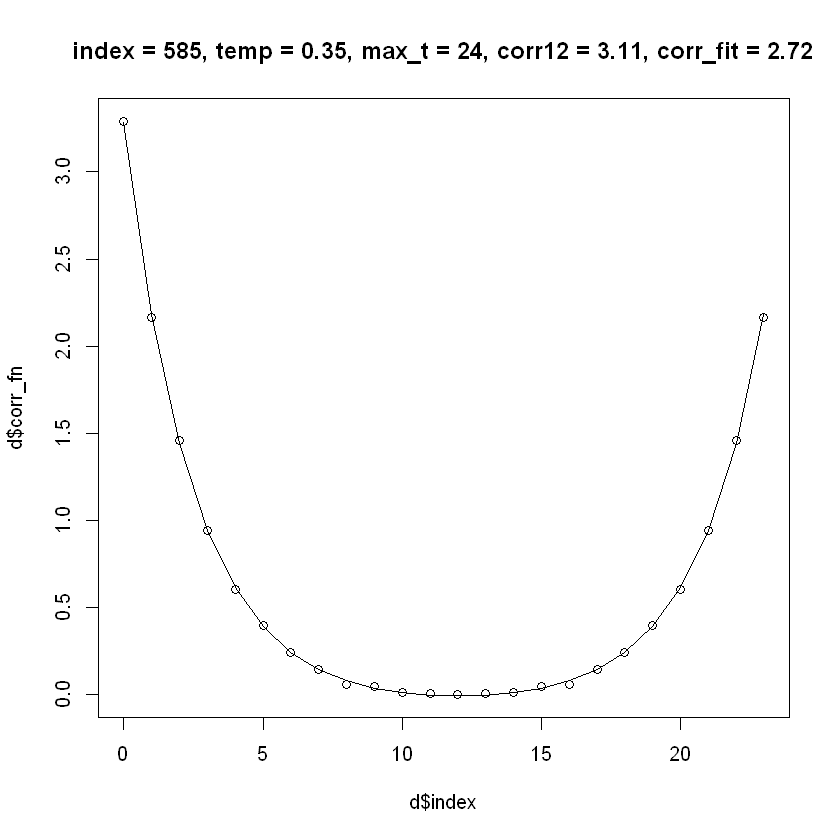

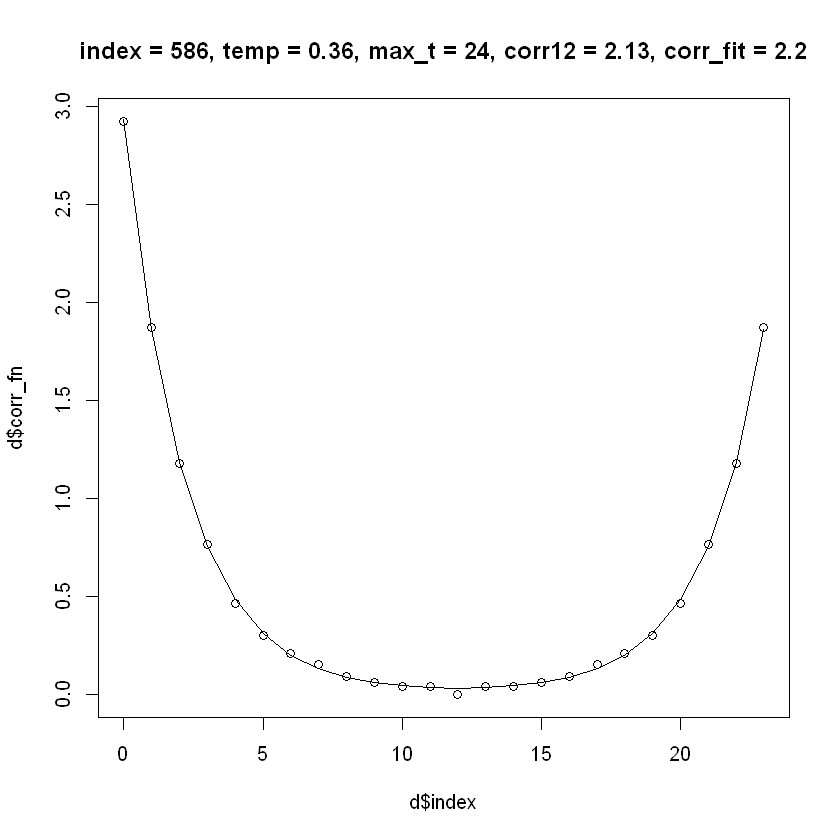

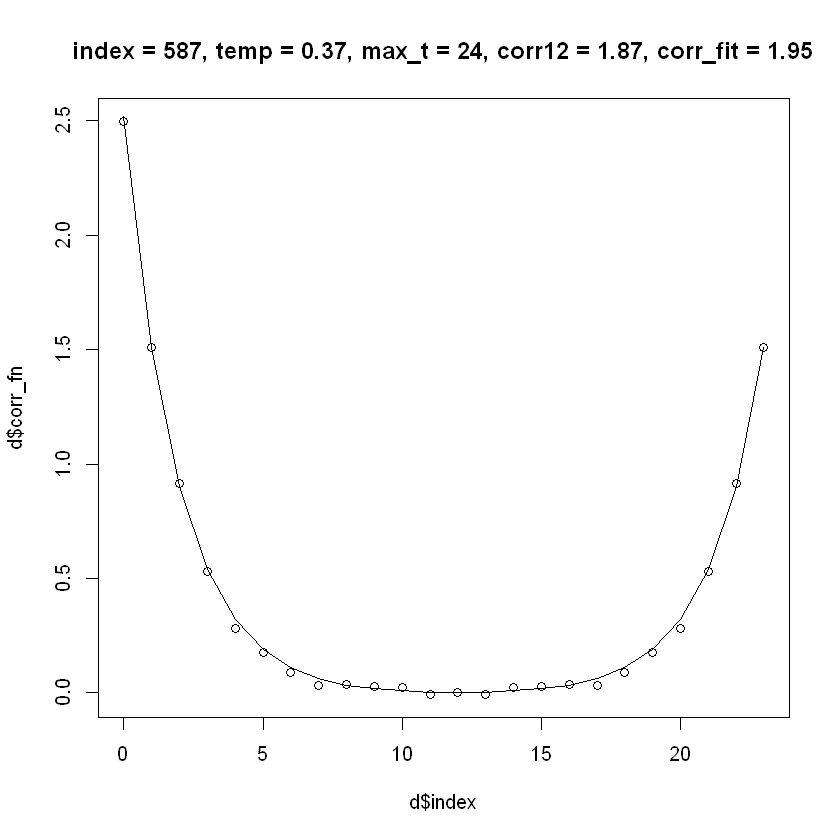

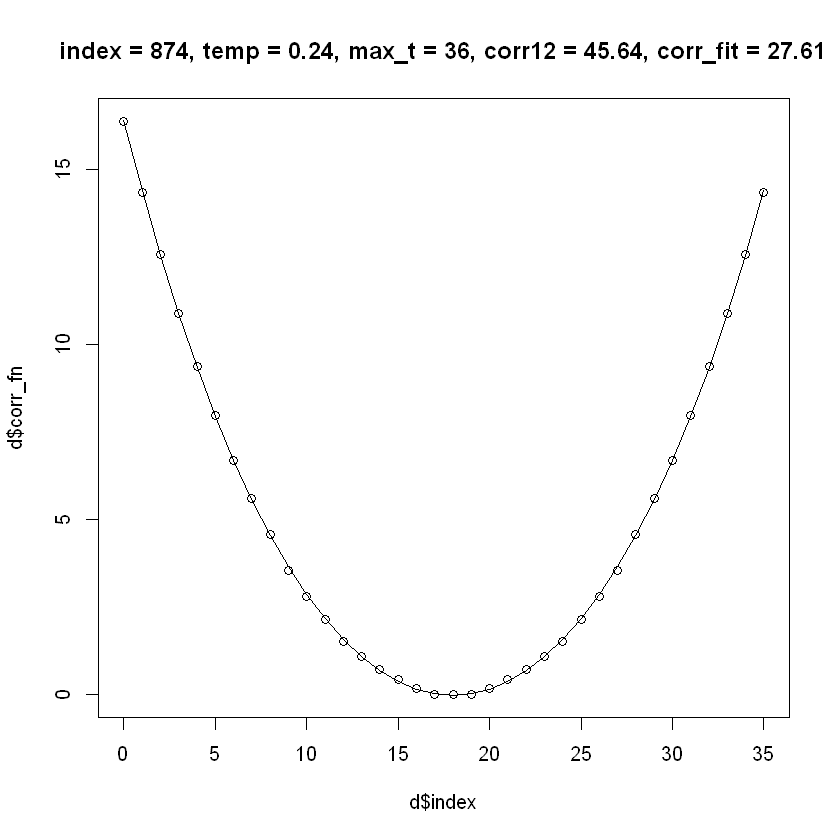

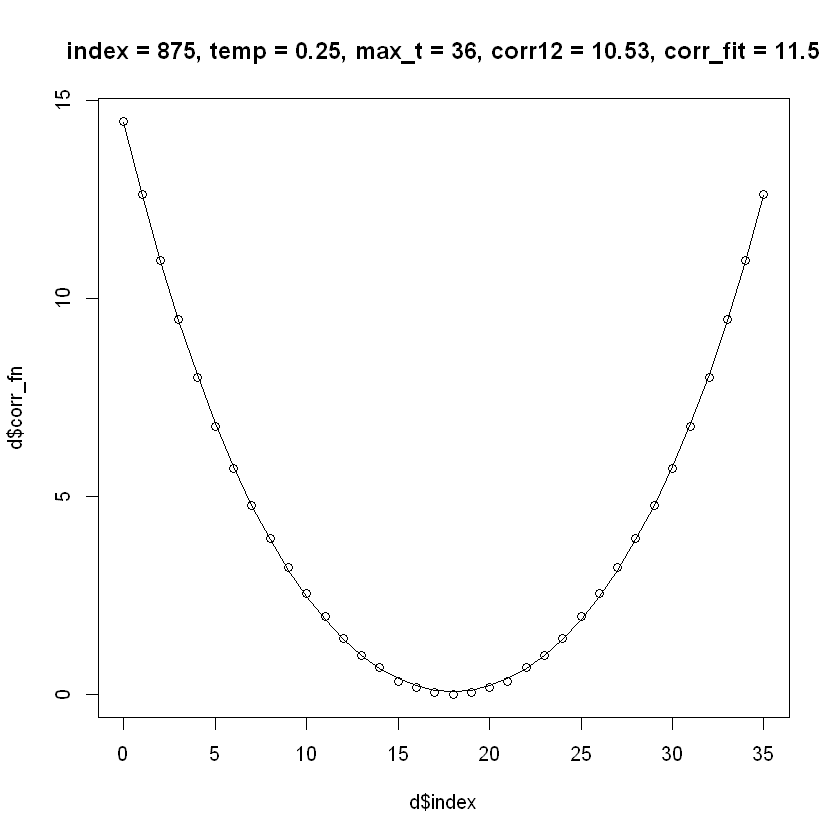

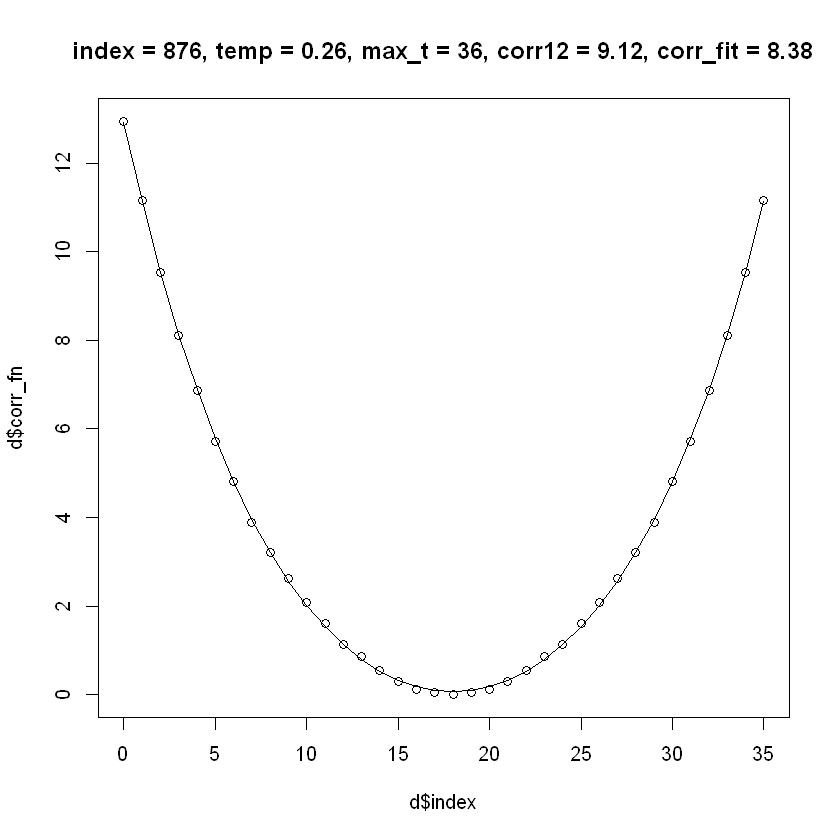

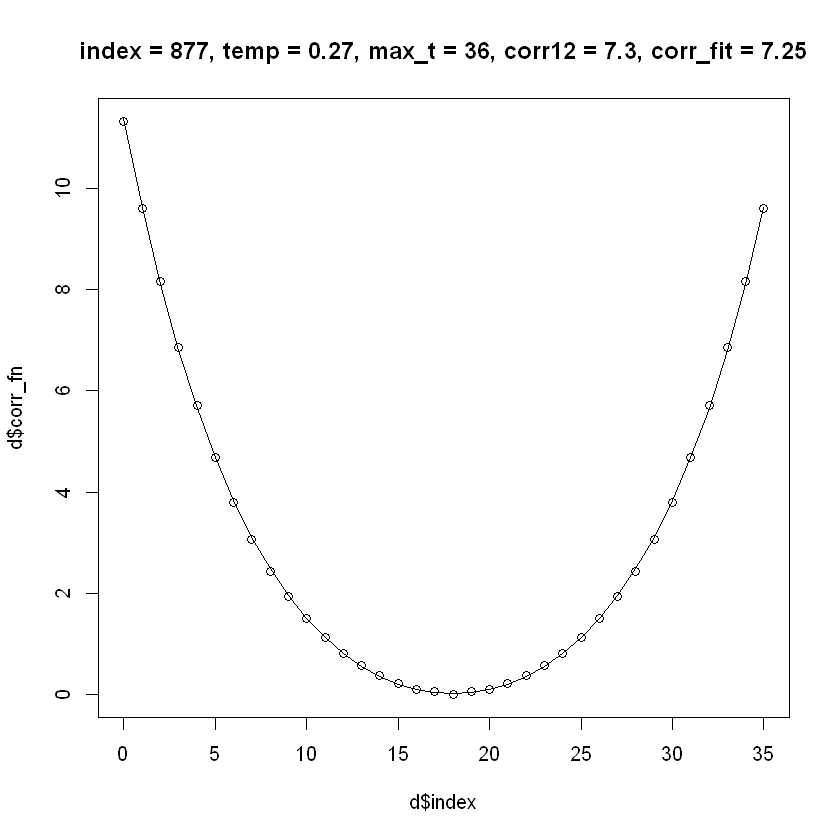

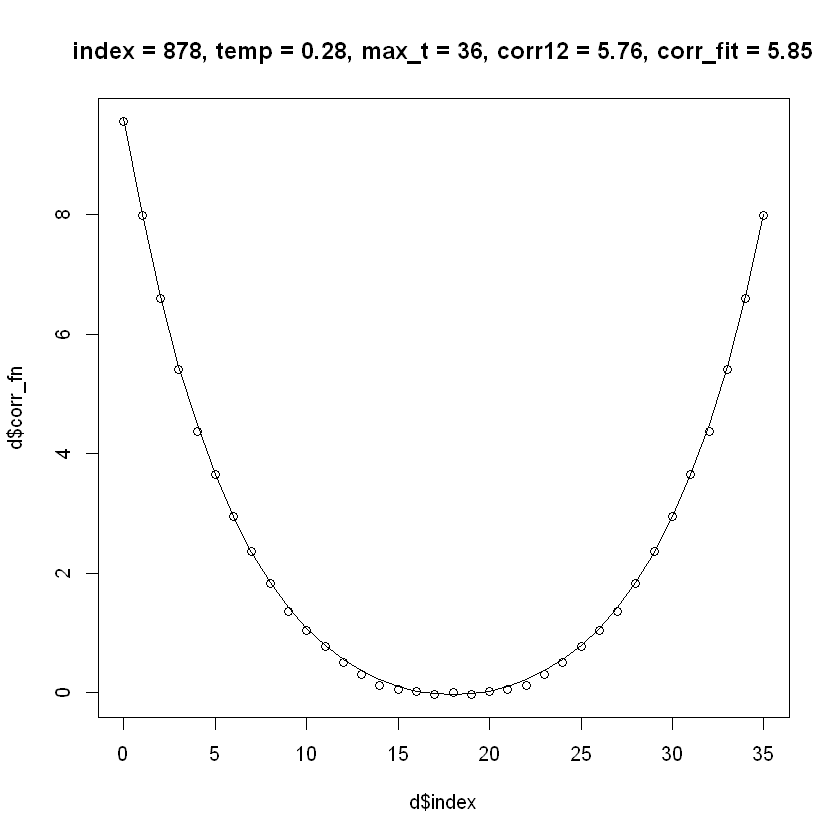

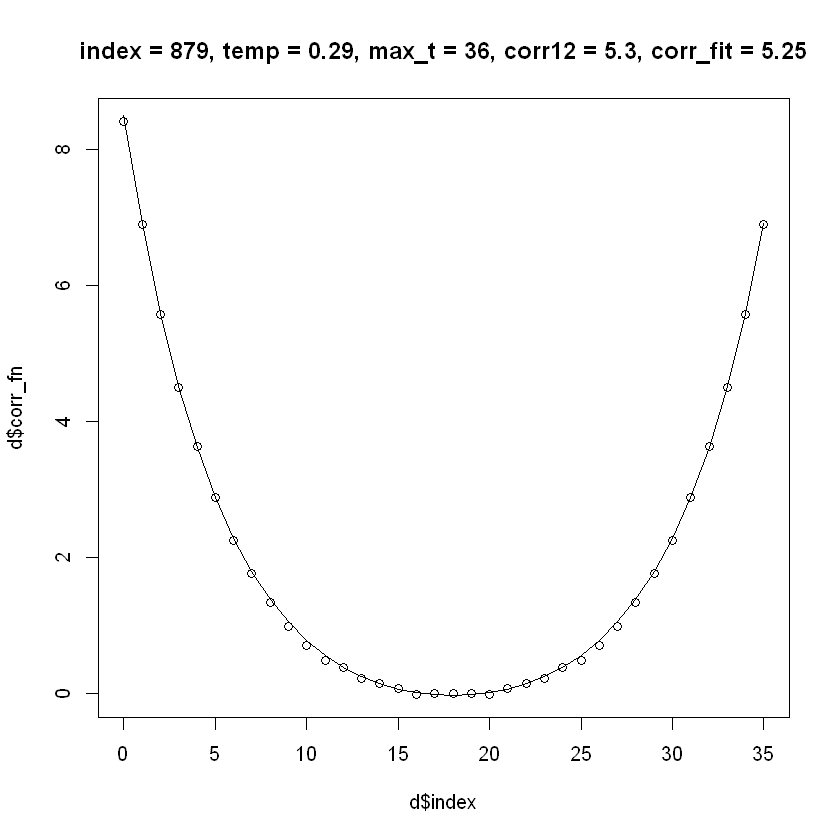

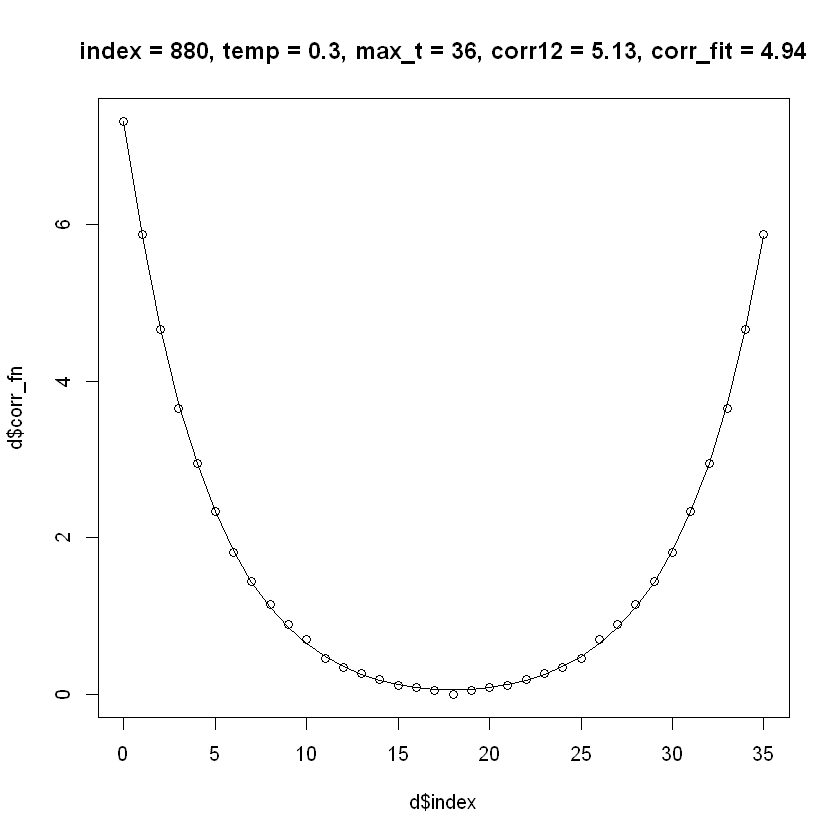

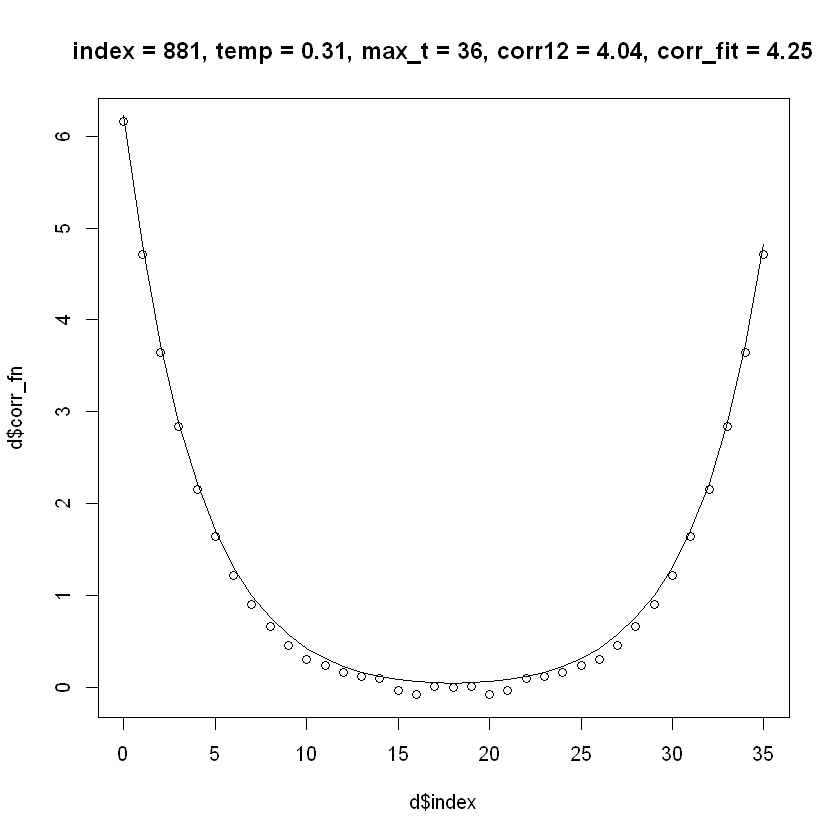

In [5]:
indices <- dat$index
for (index in indices) {
	d <- read.csv(paste("..\\data\\plot_data\\comp_correlation_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
	colnames(d) <- c("corr_fn")
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index,
		", temp = ", round(overview$temp[overview$index == index],  digits = 3),
		", max_t = ", overview$max_t[overview$index == index],
		", corr12 = ", overview$corr12[overview$index == index], ", corr_fit = ", overview$corr_fit[overview$index == index], sep = ""))
	lines(d$index, d$fit)
}